In [1]:
#import needed librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

#load the dataset
house_data = pd.read_excel('Property_yeadon_data.xlsx')

In [2]:
#have a glance at the data
house_data.shape

(420, 9)

In [3]:
house_data[:10]

,Date of purchase,Postcode,Address street number,Address street name,Locality,City,Floor area in square metres,Price the property sold for,Price per square metre
0,2022-04-08,LS19 6AB,ST ELMO,BAYTON LANE,YEADON,LEEDS,65,252500,3884.615385
1,2022-07-05,LS19 6AD,5,MOORLANDS AVENUE,YEADON,LEEDS,85,297310,3497.764706
2,2023-06-30,LS19 6AG,11,MOORFIELD CROFT,YEADON,LEEDS,90,320000,3555.555556
3,2023-05-24,LS19 6AG,12,MOORFIELD CROFT,YEADON,LEEDS,70,270000,3857.142857
4,2022-08-02,LS19 6AG,17,MOORFIELD CROFT,YEADON,LEEDS,99,365000,3686.868687
5,2022-04-01,LS19 6AH,"ROSEMOUNT HOUSE, 126",HARROGATE ROAD,YEADON,LEEDS,110,343000,3118.181818
6,2022-07-19,LS19 6AH,144,HARROGATE ROAD,YEADON,LEEDS,102,335000,3284.313725
7,2022-03-07,LS19 6AN,11,BENTON PARK DRIVE,RAWDON,LEEDS,83,325000,3915.662651
8,2022-10-28,LS19 6AN,23,BENTON PARK DRIVE,RAWDON,LEEDS,89,323500,3634.831461
9,2022-04-29,LS19 6AN,39,BENTON PARK DRIVE,RAWDON,LEEDS,70,228500,3264.285714


In [4]:
#checking for any anomalies in the data 
house_data.isnull().sum()

Date of purchase               0
Postcode                       0
Address street number          0
Address street name            1
Locality                       1
City                           0
Floor area in square metres    0
Price the property sold for    0
Price per square metre         0
dtype: int64

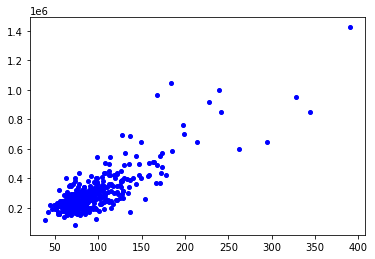

In [5]:
#Display the data looking specifically at prices and surfaces
plt.plot(house_data['Floor area in square metres'], house_data['Price the property sold for'], 'bo', markersize=4)
plt.show()

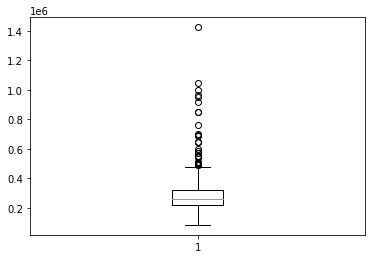

In [6]:
#Boxplot visualisation of the property prices
plt.boxplot(house_data['Price the property sold for'])
plt.show()

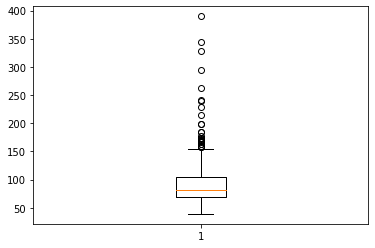

In [7]:
#Boxplot visualisation of the property prices
plt.boxplot(house_data['Floor area in square metres'])
plt.show()

In [8]:
#Overview of the data
house_data.describe()

,Floor area in square metres,Price the property sold for,Price per square metre
count,420.000000,4.200000e+02,420.000000
mean,92.902381,2.970445e+05,3252.398294
std,40.513087,1.427241e+05,780.540405
min,39.000000,8.500000e+04,1164.383562
25%,69.000000,2.200000e+05,2738.871636
50%,82.000000,2.600000e+05,3155.666416
75%,104.000000,3.250000e+05,3707.264957
max,390.000000,1.425000e+06,6349.206349


Looking at the data, the average square metre price for Yeadon seems to be 3253£ for the period between January 2022 and October 2023.

There seem to be a lot of outliers in our dataset. We would need more data to check on it.

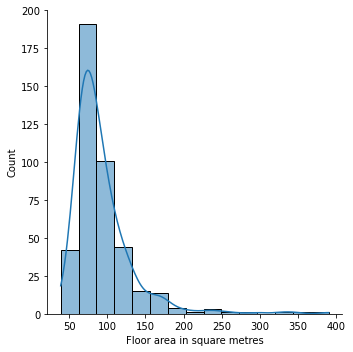

In [9]:
#create histogram with density curve overlaid
sns.displot(house_data['Floor area in square metres'], kde=True, bins=15)

# Observations

The average property price seems to be just under 300 000£ (297 045£ according to the data). The average size house is about 92 square metres. 

# Linear regression

Based on our current dataset, which is small, let's try to do a linear regression to predict the property price for next year. We will probably need to get more data to verify it.

In [10]:
# We use one variables to explain the price tendency, the floor area of the property.
X = pd.DataFrame(np.c_[house_data['Floor area in square metres']], columns = ['surface'])
Y = pd.DataFrame(np.c_[house_data['Price the property sold for']], columns = ['price'])

In [11]:
X[:1]

,surface
0,65


In [12]:
Y[:1]

,price
0,252500


In [13]:
X.shape

(420, 1)

In [14]:
Y.shape

(420, 1)

In [15]:
#training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(336, 1)
(84, 1)
(336, 1)
(84, 1)


In [16]:
#fitting the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [17]:
#Evaluation of the training set
from sklearn.metrics import r2_score
y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train,y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print('The performance of the prediction model')
print('The Root Mean Square Error is {}'.format(rmse))
print('The R2 score is {}'.format(r2))

The performance of the prediction model
The Root Mean Square Error is 74998.22431970057
The R2 score is 0.6866979975301188


In [18]:
#Evaluation of the testing set
y_test_predict = linear_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('The performance of the prediction model')
print('The Root Mean Square Error is {}'.format(rmse))
print('The R2 score is {}'.format(r2))

The performance of the prediction model
The Root Mean Square Error is 96431.6573511723
The R2 score is 0.67941619046665


In [19]:
#checking the result
x_new = pd.DataFrame(np.c_[70], columns = ['surface'])
y_new = linear_model.predict(x_new)

In [20]:
y_new

array([[229254.78383024]])

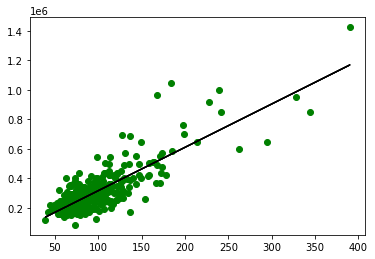

In [21]:
#draw the linear regression
plt.scatter(X, Y,color='g')
plt.plot(X, linear_model.predict(X),color='k')

plt.show()

# Conclusion

Our simple linear regression has a Pearson coefficient R2 of 0.67. It's not bad considering the small amount of data given, but it is clearly a simplification of the problem. 

We can conclude that if we were looking to buy in Yeadon an average size house of 92 square metres, it would cost approximately 290 000£. This means, we are above the stamp duty treshold (250 000£), unless the buyer is a first time buyer in the UK and the law doesn't change since then.

We can look at refining our model by getting more data, or getting more information on the properties. This would involve a lot more data scrapping, and finding a ay to refine getting the information automatically as adverts do not always mention all the attributes of a property, such as a garage, the number of bedrooms etc. This is because in the UK there is no standardisation into what is considered a bedroom (for example in France, it has to be a minimum of 9 metres square, otherwise it is just an office room), so it would be difficult to get a good dataset.